<a href="https://colab.research.google.com/github/jahnavi1thoom/ml-algorithms-week-11-/blob/main/Random_forest(social_ads).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
#mount your drive
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/My Drive/Social_Network_Ads.csv'

df = pd.read_csv(path)
print(df.head)

Mounted at /content/drive
<bound method NDFrame.head of       User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]>


In [3]:
df.isnull().sum()

,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


In [4]:
x=df.iloc[:,2:4].values
y=df.iloc[:,-1].values

In [5]:
#training the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [6]:
#transform the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [7]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=10,criterion='entropy')
classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [8]:
#accuracy
y_pred=classifier.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9

In [9]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[48  4]
 [ 4 24]]


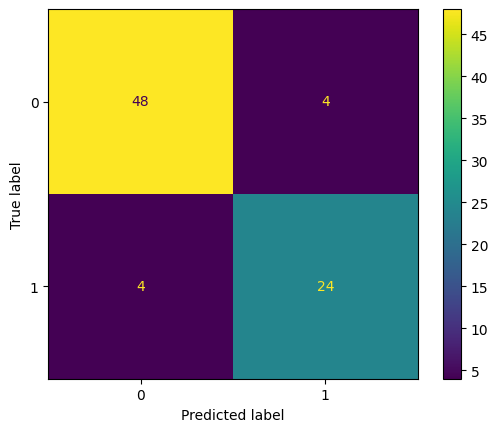

In [11]:
#plot for confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

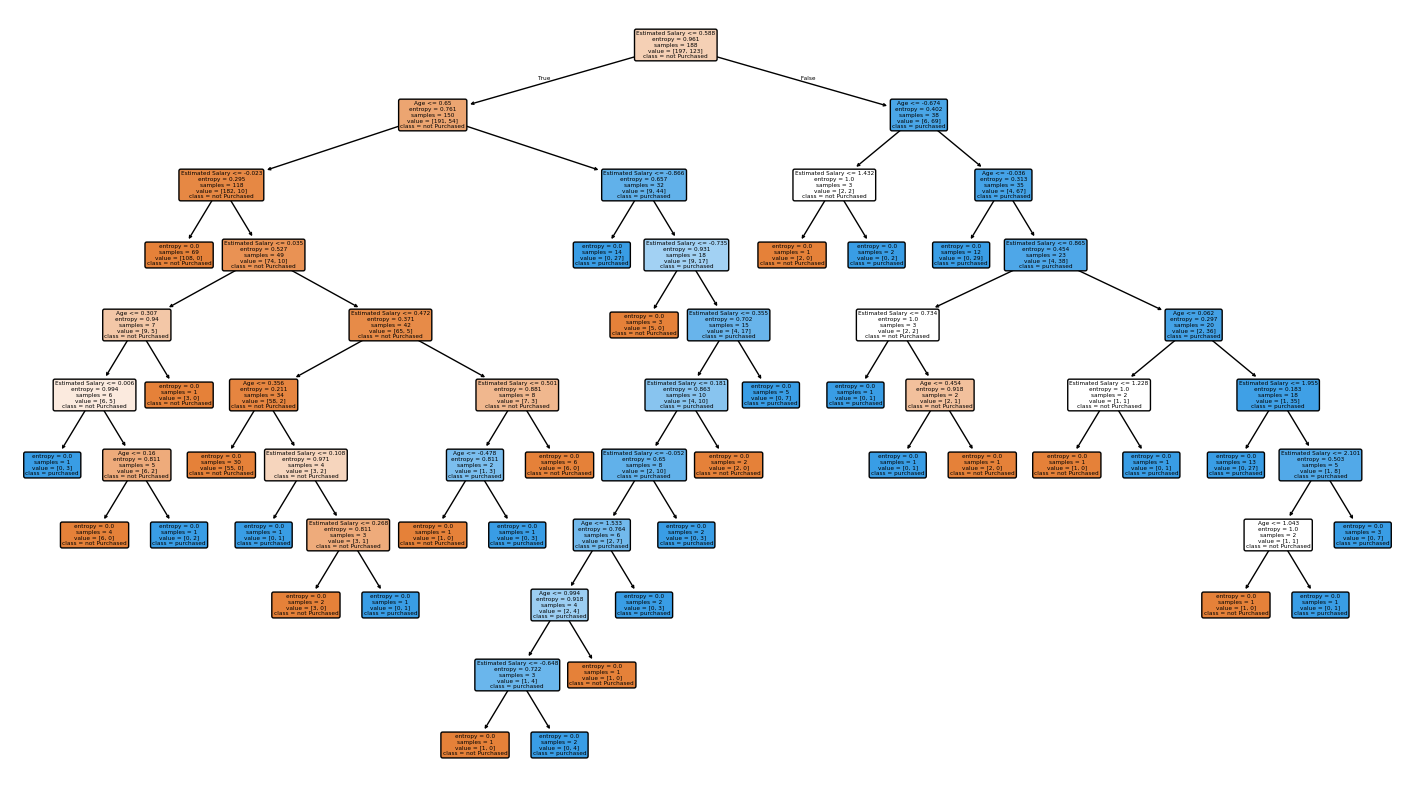

In [14]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
single_tree=classifier.estimators_[6]
plt.figure(figsize=(18,10))
plot_tree(single_tree,
          filled=True,
          feature_names=['Age','Estimated Salary'],
          class_names=["not Purchased","purchased"],
          rounded=True
          )
plt.show()